In [1]:
library(qvalue)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/MOFA/"
T = 0.05

In [3]:
### sc-StructLMM

In [4]:
summary_filename = paste0(folder, "MOFA1/summary_endo_eqtl.csv")
df0 = read.csv(summary_filename, row.names = 1)
df0 = df0[df0$chrom == 22,] 
nrow(df0)
head(df0,2)

[1] 121

,gene,n_snps,chrom,pv_raw,snpID,pv
15,ENSG00000189306_RRP7A,3,22,0.4948269,22_42896474_T_C,1.0000000
16,ENSG00000189306_RRP7A,3,22,0.2273792,22_42897414_A_C,0.6821375


In [5]:
df0$qv = qvalue(df0$pv, pi0 = 1)$qvalue
mofa1 = length(unique(df0[df0$qv<T,"gene"]))
n_genes1 = length(unique(df0$gene))
c(mofa1,n_genes1, mofa1/n_genes1)

[1] 10.0000000 88.0000000  0.1136364

In [6]:
### FE model

In [7]:
summary_filename = paste0(folder, "MOFA1_FE/summary_endo_eqtl.csv")
df1 = read.csv(summary_filename, row.names = 1)
df1 = df1[df1$chrom == 22,]
nrow(df1)
head(df1,2)

[1] 103

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000189306_RRP7A,3,22,8.489031e-07,22_42896474_T_C,2.546709e-06
1,ENSG00000189306_RRP7A,3,22,5.552467e-07,22_42897414_A_C,1.665740e-06


In [8]:
df1$qv = qvalue(df1$pv, pi0 = 1)$qvalue
mofa1 = length(unique(df1[df1$qv<T,"gene"]))
n_genes1 = length(unique(df1$gene))
c(mofa1,n_genes1, mofa1/n_genes1)

[1] 15.0000000 71.0000000  0.2112676

In [9]:
### merge

In [10]:
df2 = inner_join(df0, df1, by = c("gene","snpID"), suffix = c(".slmm2",".fe"))

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

In [11]:
cor(-log10(df2$pv.slmm2), -log10(df2$pv.fe))

[1] 0.1261797

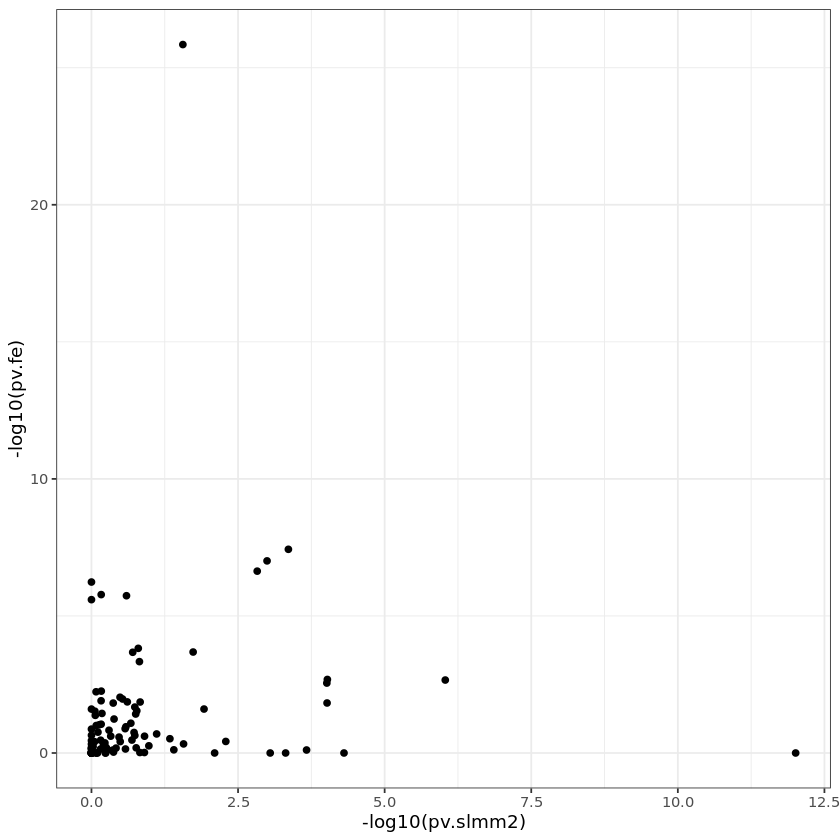

In [12]:
ggplot(df2, aes(x = -log10(pv.slmm2), y = -log10(pv.fe))) + geom_point() + theme_bw() #+ 
#     xlim(c(0,8)) + ylim(c(0,8)) + geom_abline()